In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
Rc = 200
Np = 1e5
S = 0.5

In [32]:
space = np.zeros((2*Rc+5, 2*Rc+5))
def get_neighbors(r, c):
    return [space[r][c] for r, c in [(r+1, c), (r-1, c), (r, c+1), (r, c-1)]]

# set seed
r0, c0 = Rc+2, Rc+2

r, c = r0, c0
space[r][c] = 1

# define border padding
space[0:2, :] = 2
space[-2:, :] = 2
space[:, 0:2] = 2
space[:, -2:] = 2

i = 0
while True:
    R = min(max(np.sqrt(((s:=np.where(space==1))[0]-r0)**2 + (s[1]-c0)**2))+5, Rc)
    r, c = int(R*np.cos(theta:=2*np.pi*np.random.rand())+c0), int(R*np.sin(theta)+r0)

    neighbors = get_neighbors(r, c)
    while 2 not in neighbors:
        if 1 in neighbors:
            if np.random.rand() < S:
                space[r][c] = 1
                i += 1
                break

        # do a random walk
        if np.random.rand() < 0.5:
            r += np.random.choice([-1, 1])
        else:
            c += np.random.choice([-1, 1])
        neighbors = get_neighbors(r, c)

    if space[r][c]==1:
        if 2 in get_neighbors(r, c) or np.sqrt((r-r0)**2+(c-c0)**2) >= Rc:
            print("Hit border")
            break
    
    if i >= Np:
        print("Spawned required number of particles")
        break

KeyboardInterrupt: 

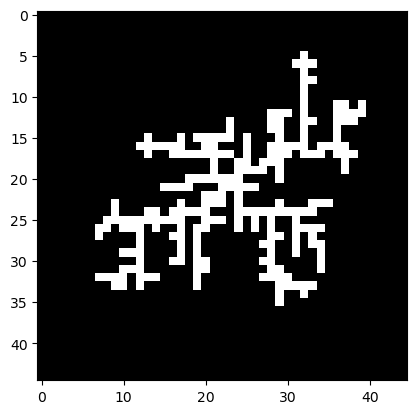

In [30]:
space[np.where(space==2)] = 0
plt.imshow(space, cmap='afmhot')
plt.show()